<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:35%"><img src='https://drive.google.com/uc?export=view&id=1zIB3Nw_z8N2SJSSdd2yWQIsDS0MGPYKm' style="width: 300px; height: 90px; "></th>
        <th style="text-align:center;"><h2>IS453 Financial Analytics</h2><h2>Week 12 - Credit model- Scorecard Lab Activity</h2></th>
    </tr>
</table>

# Scorecard development for credit default dataset

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

<a id='variable_def'></a>
### Variables definition


 - ID : Customer ID
 - LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
 - SEX: Gender (1 = male; 2 = female).
 - Education: (1 = graduate school; 2 = university; 3 = high school; 4 = others).
 - Marital status: (1 = married; 2 = single; 3 = others).
 - Age: (years).
 - PAY_0 to PAY_6 : past monthly payment records (from April to September, 2005). Scale is : -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
  - PAY_0 : Repayment status in September, 2005
  - PAY_2 : Repayment status in August, 2005
  - PAY_3 : Repayment status in July, 2005
  - PAY_4 : Repayment status in June, 2005
  - PAY_5 : Repayment status in May, 2005
  - PAY_6 : Repayment status in April, 2005
 - BILL_AMT1 - BILL AMT6 : Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.
 - PAY_AMT1 - PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .; PAY_AMT6 = amount paid in April, 2005.
 - default payment next month : binary response variable indicating customer default(1=yes, 0=no)

# Part 1 - EDA

**The EDA part has been done for you to go through and understand the data better**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !pip install --user xlrd==2.0.1

In [3]:
#use header = 1 since the col names are in row 2 in excel
default_data = pd.read_excel("default_of_credit_card_clients.xls", header = 1)

In [4]:
default_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
#check column details
default_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
#number of missing values per column
default_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
#statistics for numreic colulmns
default_data.describe()

#Note : In the below output, stats has been computed for categorical variables which have numeric values.
#We should instead treat them as categories and use frequency distribution(category counts)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


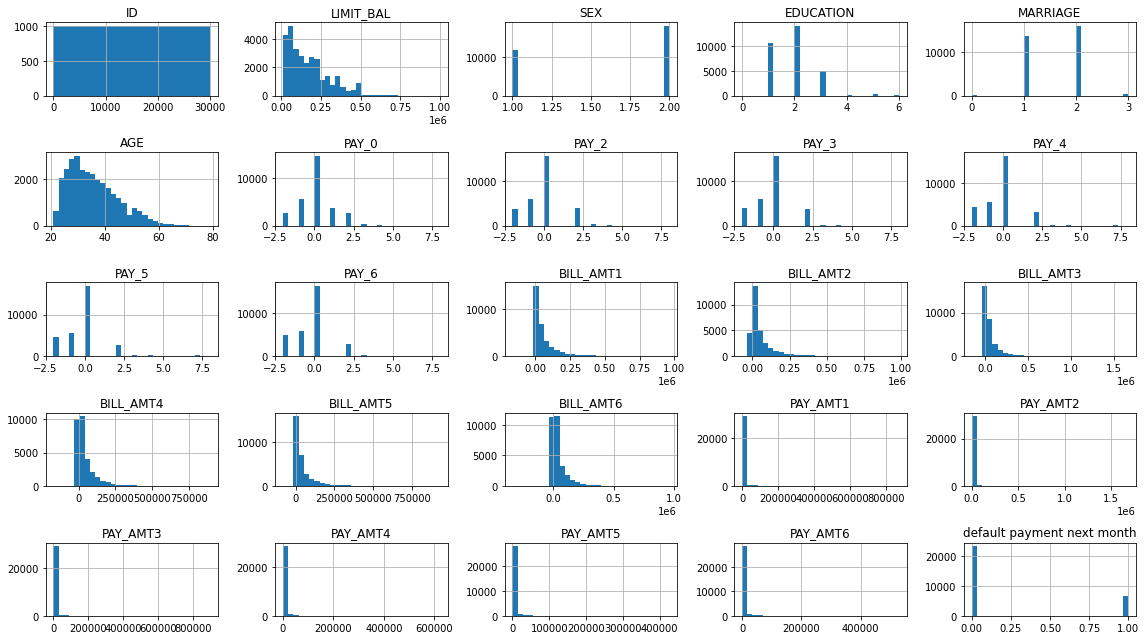

In [8]:
default_data.hist(figsize=(16,9),bins=30)
plt.tight_layout()

In [9]:
default_data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

**We notice that certain varaibles are actually categorical but recognised as numeric by default. Sex, Education, Marriage, PAY_0 to PAY_6, default payment next month are categorical.**


### Univariate and Bivariate analysis

#### Default percent

In [10]:
#rename default column
default_data.rename(columns = {"default payment next month" : 'default'}, inplace=True)

In [11]:
default_data['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

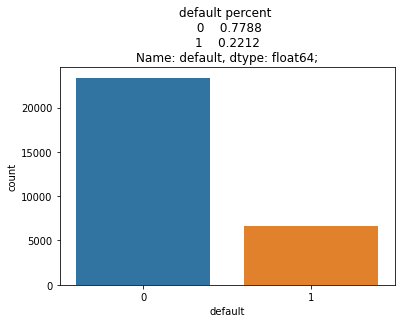

In [12]:
sns.countplot(x = default_data['default'])
normalise_count = default_data['default'].value_counts(normalize = True)
ax = plt.title('default percent \n {};'.format(normalise_count))

## Customer demographics

### AGE

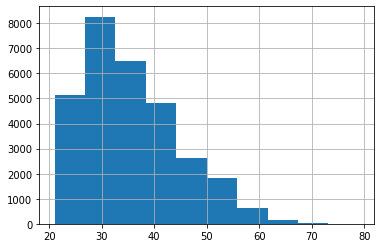

In [13]:
default_data['AGE'].hist()
plt.show()

#higher concentration between 25 - 40 yrs

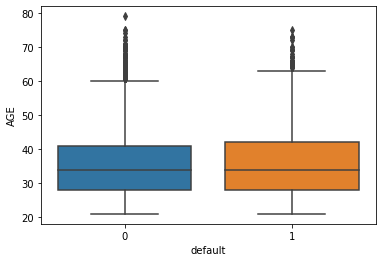

In [14]:
#bivaraite analysis - boxplot across default categories
sns.boxplot(y = default_data['AGE'] , x = default_data['default'])
plt.show()

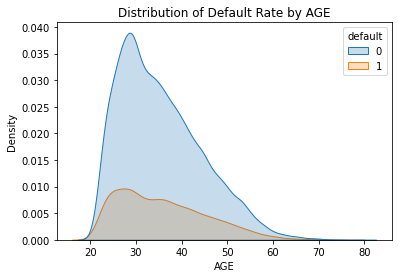

In [15]:
sns.kdeplot(data = default_data, x="AGE", hue="default", fill = True)
plt.title('Distribution of Default Rate by AGE')
plt.show()

https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot <br>
https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde

### Sex
For details, see [**Variables definition**](#variable_def).

In [16]:
default_data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [17]:
#Encode the numeric categories to strings

def encode_SEX(sex_cat):
    if sex_cat == 1:
        return 'Male'
    else:
        return 'Female'

default_data['SEX']  = default_data['SEX'].apply(encode_SEX)
default_data.SEX.value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

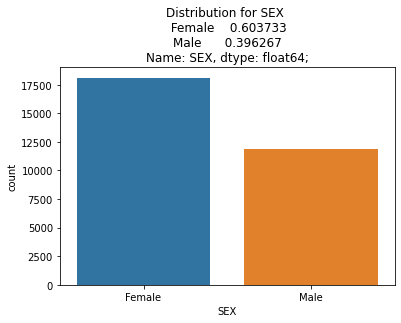

In [18]:
#2 = Female, 1 = Male
normalise_count = default_data['SEX'].value_counts(normalize = True)
sns.countplot(x = default_data['SEX'])
plt.title('Distribution for SEX \n {};'.format(normalise_count));

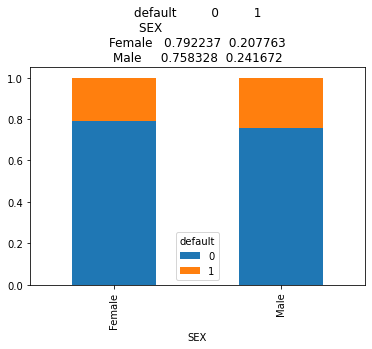

In [19]:
#Plot a percent stacked bar chart for bivariate analysis
df_sexBivariate = default_data.groupby('SEX')['default'].value_counts(normalize=True).unstack()

#assigning the plot to a variable to supress printing of additional matplotlib messages
df_plot = df_sexBivariate.plot(kind='bar', stacked='True', title = str(df_sexBivariate))

**Summary**
- There are more women customers
- Men have a higher rate of default



### Education
For details, see [**Variables definition**](#variable_def).

In [20]:
#1 = graduate school; 2 = university; 3 = high school; 4 = others).

default_data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

**Label Encoding**

In [21]:
#Let us merge the UNKNOWN categories 0 , 5 , 6 to 4(others) and rename categories to strings

def encode_EDU(edu_cat):
    if (edu_cat == 0 or edu_cat == 5 or edu_cat == 6 or edu_cat ==4):
        return 'Others'
    if edu_cat == 1:
        return 'graduate'
    if edu_cat == 2:
        return 'university'
    if edu_cat == 3:
        return 'high school'

default_data['EDUCATION']  = default_data['EDUCATION'].apply(encode_EDU)
default_data.EDUCATION.value_counts()

university     14030
graduate       10585
high school     4917
Others           468
Name: EDUCATION, dtype: int64

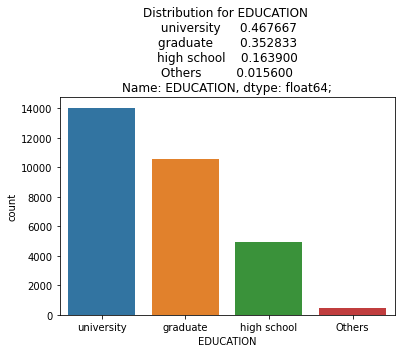

In [22]:
#create a countplot for distribution
#solution

normalise_count = default_data['EDUCATION'].value_counts(normalize = True)
sns.countplot(x = default_data['EDUCATION'])
plt.title('Distribution for EDUCATION \n {};'.format(normalise_count));

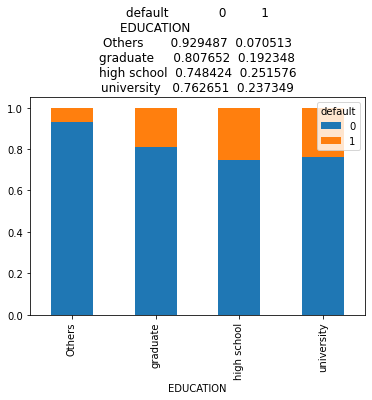

In [23]:
#Plot a percent stacked bar chart for bivariate analysis
#solution

df_EduBivariate = default_data.groupby('EDUCATION')['default'].value_counts(normalize=True).unstack()

df_EduBivariate.plot(kind='bar', stacked='True', title = str(df_EduBivariate));

Summary
- Most customers are from the university or graduate school
- Customers with high school cert have the highest rate of default followed by those who went to university
- Education seems to negatively impact the default rate

### Marital status

In [24]:
def encode_mar(edu_cat):
    if (edu_cat == 0 or edu_cat == 3):
        return 'Others'
    if edu_cat == 1:
        return 'married'
    if edu_cat == 2:
        return 'single'

default_data.MARRIAGE = default_data.MARRIAGE.apply(encode_mar)
default_data.MARRIAGE.value_counts()

single     15964
married    13659
Others       377
Name: MARRIAGE, dtype: int64

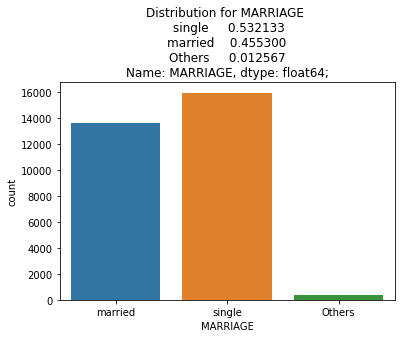

In [25]:
normalise_count = default_data['MARRIAGE'].value_counts(normalize = True)
sns.countplot(x = default_data['MARRIAGE'])
plt.title('Distribution for MARRIAGE \n {};'.format(normalise_count));

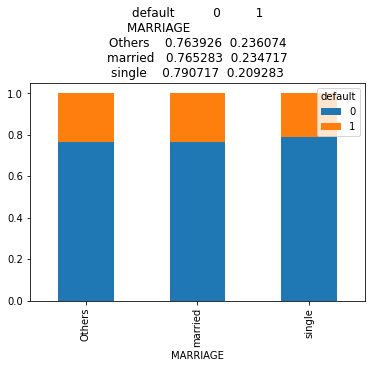

In [26]:
#Plot a percent stacked bar chart for bivariate analysis
df_MarBivariate = default_data.groupby('MARRIAGE')['default'].value_counts(normalize=True).unstack()

df_MarBivariate.plot(kind='bar', stacked='True', title = str(df_MarBivariate));


- Most customers are either single or married
- Default rate is lower for Single customers as compared to Married/Others

### Analyse repayment status between April 2005 and Sep 2005
For details, see [**Variables definition**](#variable_def).

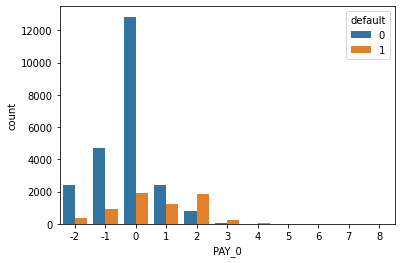

In [27]:
#-1,-2,0 imply there is no payment delay

sns.countplot(x = default_data['PAY_0'], hue = default_data['default'])
plt.show()

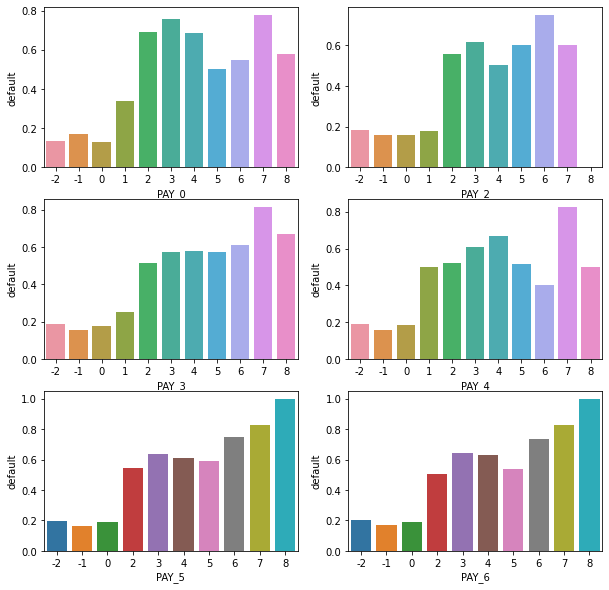

In [28]:
#multiple plots in a grid. y-axis shows mean of default.

fig , axes = plt.subplots(3,2, figsize=(10,10))
sns.barplot(x = default_data['PAY_0'] , y = default_data['default'], ci = None, ax = axes[0][0])
sns.barplot(x = default_data['PAY_2'] , y = default_data['default'], ci = None, ax = axes[0][1])
sns.barplot(x = default_data['PAY_3'] , y = default_data['default'], ci = None, ax = axes[1][0])
sns.barplot(x = default_data['PAY_4'] , y = default_data['default'], ci = None, ax = axes[1][1])
sns.barplot(x = default_data['PAY_5'] , y = default_data['default'], ci = None, ax = axes[2][0])
sns.barplot(x = default_data['PAY_6'] , y = default_data['default'], ci = None, ax = axes[2][1])
plt.show()

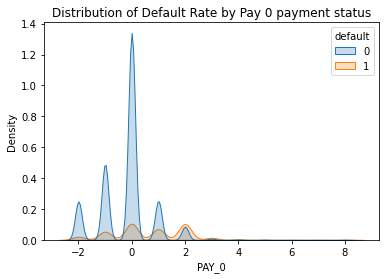

In [29]:
#you can also use kde plots for pay_0, pay_1 etc..
sns.kdeplot(data = default_data, x = default_data['PAY_0'], hue="default", fill = True)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of Default Rate by Pay 0 payment status')
plt.show()

**Summary**

 - Most customers make the bill payments on time
 - payment status is a strong indicator of customer default as there is payment delays mostly for defaulters



### Limit Balance(credit given)

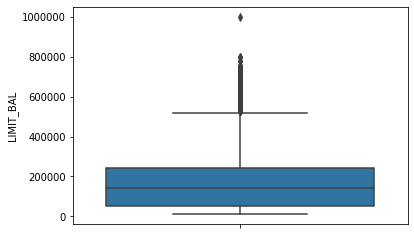

In [30]:
sns.boxplot(y = default_data['LIMIT_BAL'],)
plt.ticklabel_format(style='plain', axis='y')

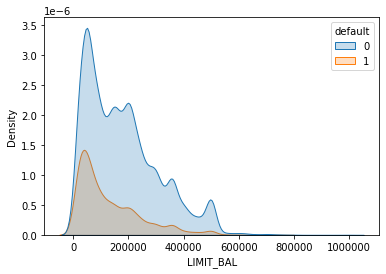

In [31]:
#By LIMIT_BAL for default vs non-default
sns.kdeplot(data = default_data, x = default_data['LIMIT_BAL'], hue="default", fill = True)
plt.ticklabel_format(style='plain', axis='x')

In [32]:
# sns.boxplot(x="default", y="LIMIT_BAL", data = default_data)
# plt.ticklabel_format(style='plain', axis='y')

**Summary**

 - Credit amount is skewed
 - Median credit is 140000 and max is 1 million
 - Most customers have a credit limit under 100000
 - Credit limit is lower for customers with a default, which is good


### Bill Amount
For details, see [**Variables definition**](#variable_def).

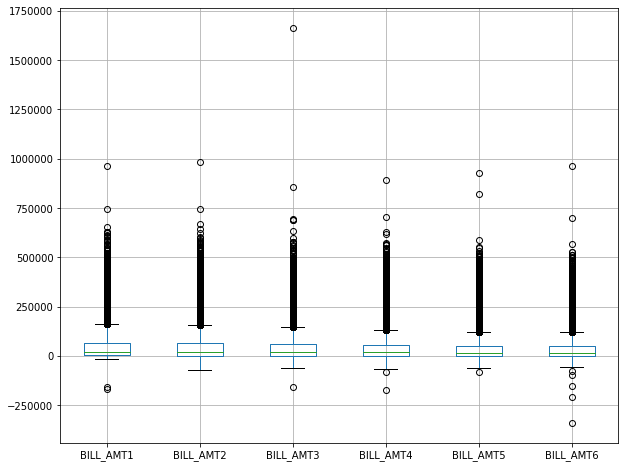

In [33]:
#subset bill amount variables

df_bill = default_data[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
df_bill.boxplot(figsize=(10,8))
plt.ticklabel_format(style='plain', axis='y')

In [34]:
%matplotlib inline

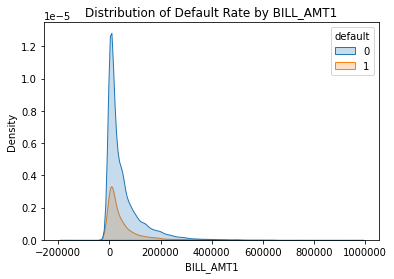

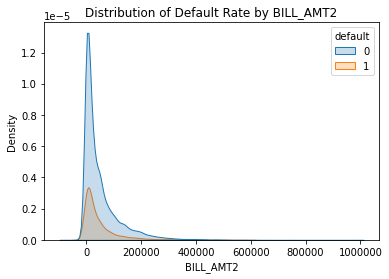

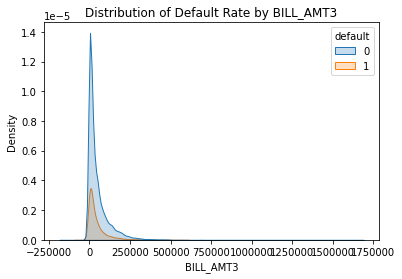

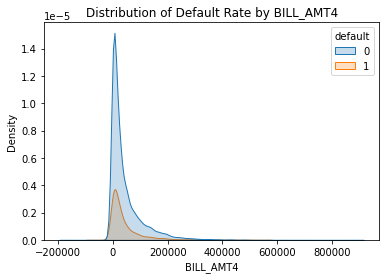

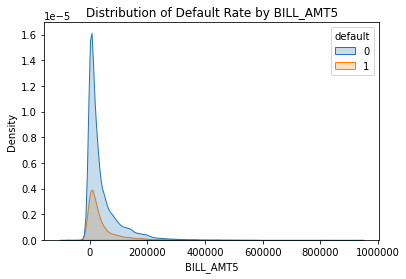

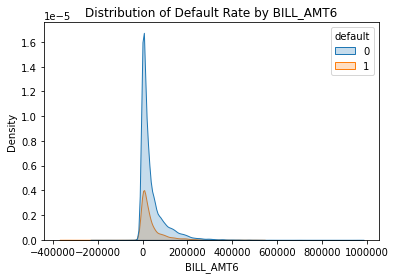

In [35]:
#By BILL_AMT1 for default vs non-default
sns.kdeplot(data = default_data, x = default_data['BILL_AMT1'], hue="default", fill = True)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of Default Rate by BILL_AMT1')
plt.show()

sns.kdeplot(data = default_data, x = default_data['BILL_AMT2'], hue="default", fill = True)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of Default Rate by BILL_AMT2')
plt.show()

sns.kdeplot(data = default_data, x = default_data['BILL_AMT3'], hue="default", fill = True)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of Default Rate by BILL_AMT3')
plt.show()

sns.kdeplot(data = default_data, x = default_data['BILL_AMT4'], hue="default", fill = True)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of Default Rate by BILL_AMT4')
plt.show()

sns.kdeplot(data = default_data, x = default_data['BILL_AMT5'], hue="default", fill = True)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of Default Rate by BILL_AMT5')
plt.show()

sns.kdeplot(data = default_data, x = default_data['BILL_AMT6'], hue="default", fill = True)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of Default Rate by BILL_AMT6')
plt.show()

**Summary**

- One extreme outlier with amount greater than credit limit
- Across months Bill amount has a similar distribution
- Negative values may indicate advance payments
- Bill amount is lower for defaulters 

### Previous payments made
For details, see [**Variables definition**](#variable_def).

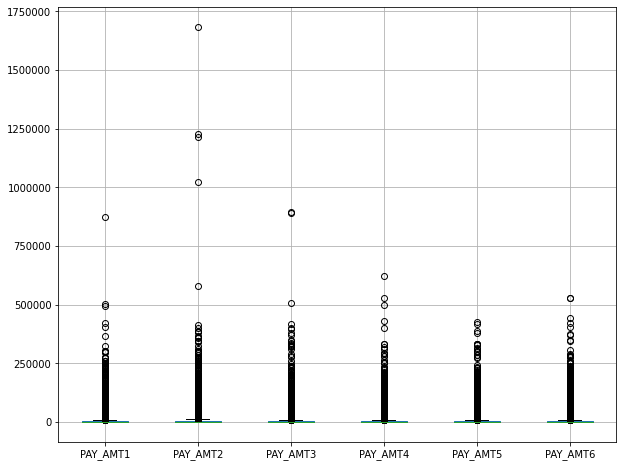

In [36]:
df_pay = default_data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
df_pay.boxplot(figsize=(10,8))
plt.ticklabel_format(style='plain', axis='y')

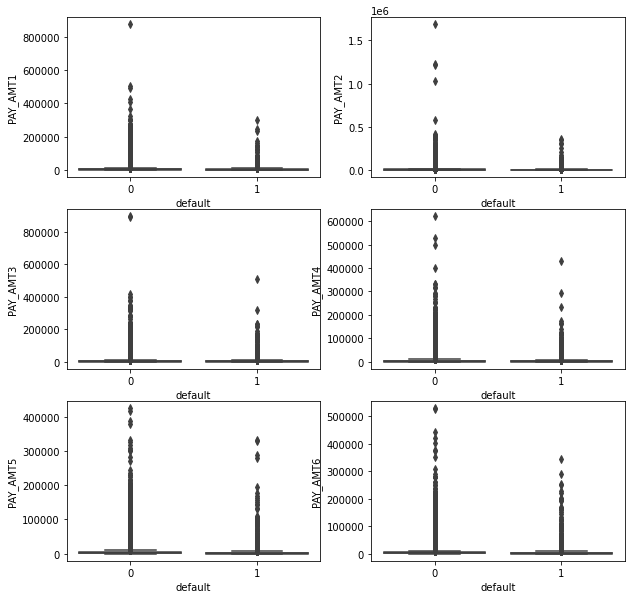

In [37]:
#multiple box plots for past payments for default vs non-default. Use kde plots if that is preferable
fig, axes = plt.subplots(3,2 ,figsize = (10,10))
sns.boxplot(x="default", y="PAY_AMT1",data=default_data, ax = axes[0,0])
sns.boxplot(x="default", y="PAY_AMT2",data=default_data, ax = axes[0,1])
sns.boxplot(x="default", y="PAY_AMT3",data=default_data, ax = axes[1,0])
sns.boxplot(x="default", y="PAY_AMT4",data=default_data, ax = axes[1,1])
sns.boxplot(x="default", y="PAY_AMT5",data=default_data, ax = axes[2,0])
sns.boxplot(x="default", y="PAY_AMT6",data=default_data, ax = axes[2,1])
plt.ticklabel_format(style='plain', axis='y')

**Summary**
 - Most customers are making smaller montly payments as compared to bill amounts. Median is close to 2k
 - payments are lower for customers with default as expected

### Correlation of variables

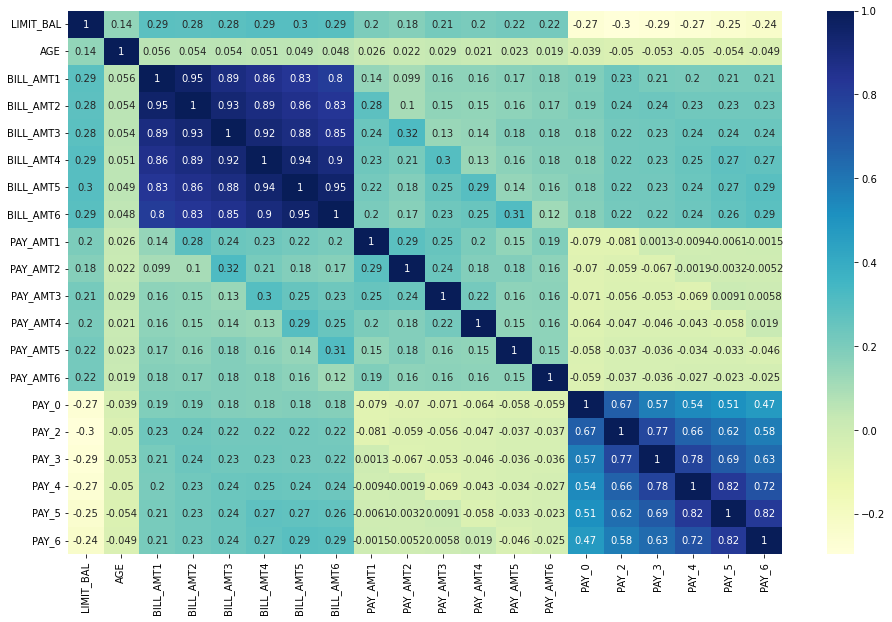

In [38]:
cor = default_data[['LIMIT_BAL','AGE',
                    'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                    'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].corr()
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(cor, annot = True, ax = ax, cmap="YlGnBu")
plt.show()
#sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,ax=ax)

<font color = 'blue' size = 4>**Ex Q1. Based on the correlations generated, Identify variables which are highly correlated(corr > 0.8). We can consider dropping some of them before modelling**</font>

Answer - Drop Bill_AMT1, Bill_AMT2, Bill_AMT3, Bill_AMT4, Bill_AMT5, Bill_AMT6, PAY_5, PAY_6

# Part 2 - Scorecard 

**Generate the scorecard. Use the scorecardpy package methods from Week 11 CreditLab_Part3 for creating the WOE bins and the Logistic regression model to predict bad probability followed by scorecard creation**

In [39]:
import scorecardpy as sc
import pprint

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [40]:
#create a copy of default_data for scorecard 

default_data_sc1 = default_data.copy()

**Drop variables with high correlation from model development.<br>
Choose from the list identified in Q1**

In [41]:
#add your code here and update the default_data_sc1 dataframe

default_data_sc1.drop(columns=['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_5', 'PAY_6'], inplace=True)

In [42]:
#add your code here
#verify that the dataframe has only the required columns for scorecard

default_data_sc1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,Female,university,married,24,2,2,-1,-1,0,689,0,0,0,0,1
1,2,120000,Female,university,single,26,-1,2,0,0,0,1000,1000,1000,0,2000,1
2,3,90000,Female,university,single,34,0,0,0,0,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,university,married,37,0,0,0,0,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,university,married,57,-1,0,-1,0,2000,36681,10000,9000,689,679,0


### Scorecardpy woe bins and IV

Reer to this table as guide for choosing variables based on IV


| Information Value | Variable Predictiveness |
| --- | --- |
| Less than 0.02 | Not useful for prediction |
| 0.02 to 0.1 | Weak predictive Power |
| 0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

In [43]:
#create the woe bins using scorecardpy.
#add your code here

bins = sc.woebin(default_data_sc1, y='default',sort=False)

[INFO] creating woe binning ...
Binning on 30000 rows and 17 columns in 00:00:14


In [44]:
#print the bins to analyse the output
#add your code here

print(bins)

{'EDUCATION':     variable                bin  count  count_distr   good   bad   badprob  \
0  EDUCATION  Others%,%graduate  11053     0.368433   8984  2069  0.187189   
1  EDUCATION         university  14030     0.467667  10700  3330  0.237349   
2  EDUCATION        high school   4917     0.163900   3680  1237  0.251576   

        woe    bin_iv  total_iv             breaks  is_special_values  
0 -0.209693  0.015253  0.024129  Others%,%graduate              False  
1  0.091416  0.004008  0.024129         university              False  
2  0.168463  0.004869  0.024129        high school              False  , 'SEX':   variable     bin  count  count_distr   good   bad   badprob       woe  \
0      SEX  Female  18112     0.603733  14349  3763  0.207763 -0.079777   
1      SEX    Male  11888     0.396267   9015  2873  0.241672  0.115154   

     bin_iv  total_iv  breaks  is_special_values  
0  0.003757   0.00918  Female              False  
1  0.005423   0.00918    Male              False 

{'EDUCATION': <Figure size 432x288 with 2 Axes>,
 'SEX': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT6': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT3': <Figure size 432x288 with 2 Axes>,
 'PAY_2': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT4': <Figure size 432x288 with 2 Axes>,
 'AGE': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT5': <Figure size 432x288 with 2 Axes>,
 'ID': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT1': <Figure size 432x288 with 2 Axes>,
 'LIMIT_BAL': <Figure size 432x288 with 2 Axes>,
 'PAY_3': <Figure size 432x288 with 2 Axes>,
 'MARRIAGE': <Figure size 432x288 with 2 Axes>,
 'PAY_4': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT2': <Figure size 432x288 with 2 Axes>,
 'PAY_0': <Figure size 432x288 with 2 Axes>}

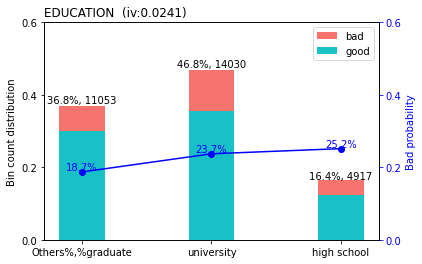

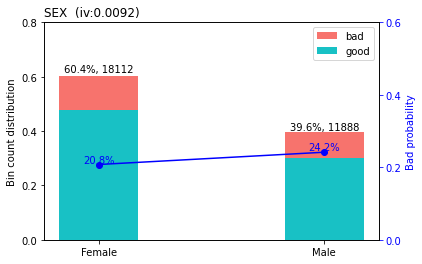

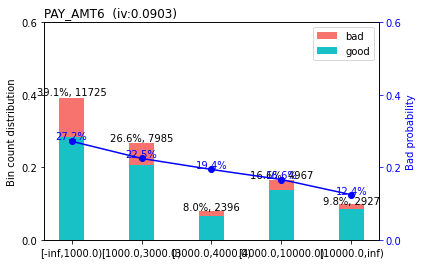

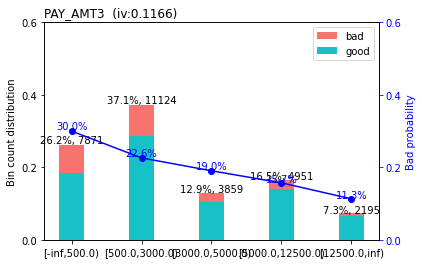

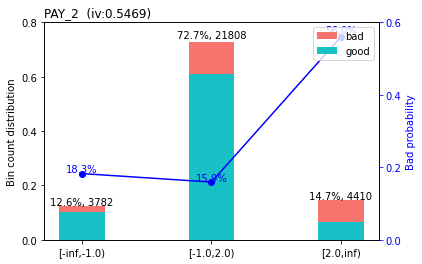

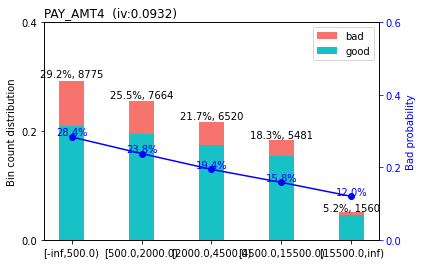

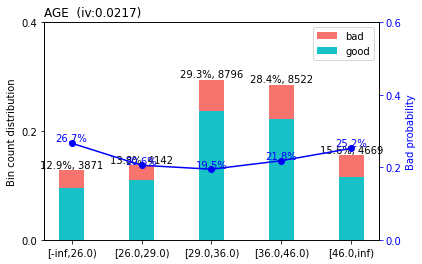

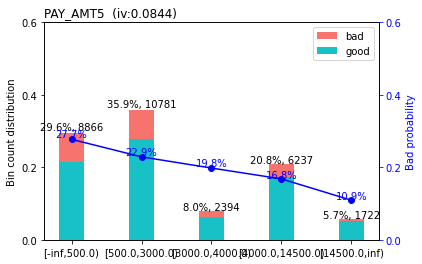

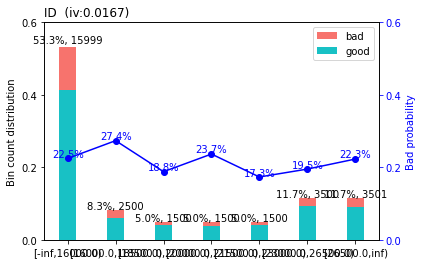

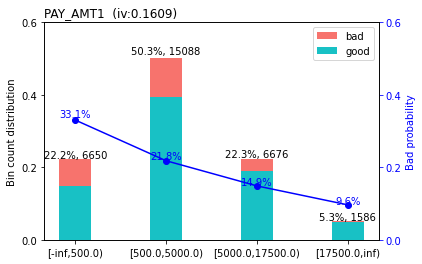

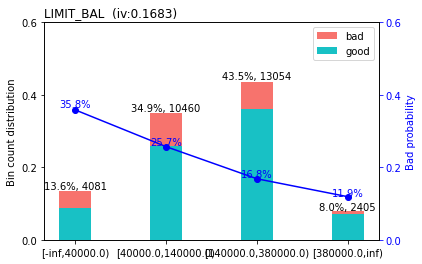

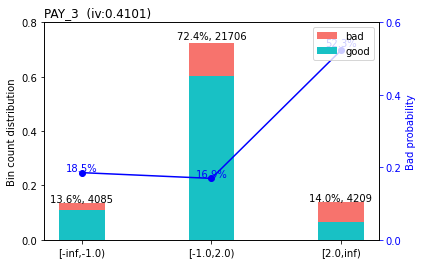

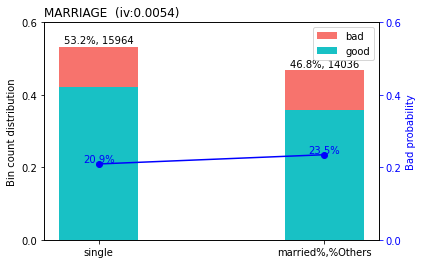

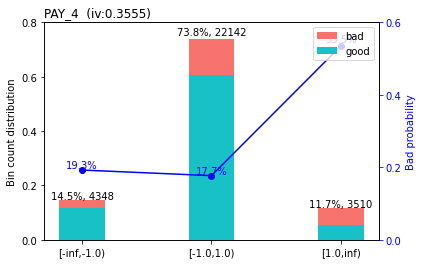

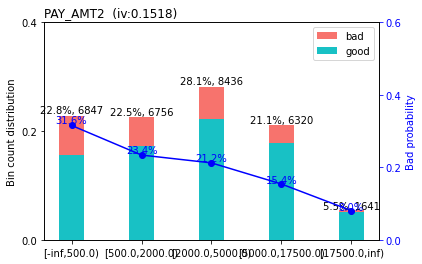

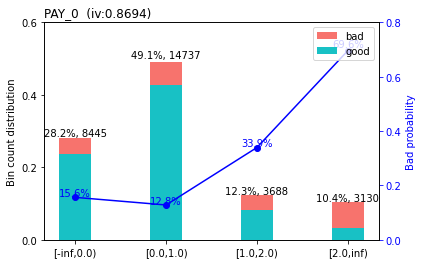

In [45]:
#plot the woe bins
#add your code here

sc.woebin_plot(bins)

### Observations/Hypothesis from weo bins and plot

For understanding the Variables, see [**Variables definition**](#variable_def).

<font color = 'blue' size = 4>Ex Q2. **Based on the woe plots and IV values list down the hypothesis and adjustments if any for each of the variables.**</font>

`Hints:`
 - Does the binning for few variables result in constant/less change in trend? Are there low IV variables?
 - For variables with medium to high predictive power is the trend Logical?
 - Do the bins need to be adjusted for Payment status variables? What are the reasons for this?
 - Which of the payment amount variables have acceptable IV?

- Add observations here

- `SEX: IV is low. Can consider dropping`
- PAY_AMT6: Looks fine and logical (downward trend)
- `MARRIAGE: IV is low. Can consider dropping`
- PAY_AMT5: Looks fine and logical (downward trend)
- `ID: No trend at all, can drop`
- PAY_3: IV looks good, slight upward trend
- PAY_AMT_1: Looks fine
- `PAY_0: IV is high. Can re-bin the firs and second bin to see a more clearer increasing trend. `
- `AGE: Trend does not say much, Low IV and can consider dropping`
- PAY_4: IV looks fine, slight upward trend
- PAY_AMT3: Logical trend and IV is rather acceptable
- PAY_2: IV is good, slight upward trend
- LIMIT_BAL: Logical trend and IV is fine
- PAY_AMT4: Looks fine
- EDUCATION: IV slightly low but upward logical trend
- PAY_AMT2: Looks fine

### Updated bins based on actions listed from the hypothesis above.

**Drop low IV variables**

In [46]:
#add your code here to drop variables and update default_data_sc1 dataframe

default_data_sc2 = default_data_sc1.copy()

In [47]:
#solution

default_data_sc2.drop(columns=['SEX', 'MARRIAGE', 'ID', 'AGE'], inplace=True)


In [63]:
print(default_data_sc2)

       LIMIT_BAL    EDUCATION  PAY_0  PAY_2  PAY_3  PAY_4  PAY_AMT1  PAY_AMT2  \
0          20000   university      2      2     -1     -1         0       689   
1         120000   university     -1      2      0      0         0      1000   
2          90000   university      0      0      0      0      1518      1500   
3          50000   university      0      0      0      0      2000      2019   
4          50000   university     -1      0     -1      0      2000     36681   
...          ...          ...    ...    ...    ...    ...       ...       ...   
29995     220000  high school      0      0      0      0      8500     20000   
29996     150000  high school     -1     -1     -1     -1      1837      3526   
29997      30000   university      4      3      2     -1         0         0   
29998      80000  high school      1     -1      0      0     85900      3409   
29999      50000   university      0      0      0      0      2078      1800   

       PAY_AMT3  PAY_AMT4  

**Define bin adjustments and create new bins2**

In [48]:
#add your code here

breaks_adj = {'PAY_0': [0.5, 1.0, 1.5, 2.0], }
bins2 = sc.woebin(default_data_sc2, y='default', breaks_list=breaks_adj)

[INFO] creating woe binning ...
Binning on 30000 rows and 13 columns in 00:00:10


**Plot the updated WOE bins** 

{'EDUCATION': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT5': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT1': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT6': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT3': <Figure size 432x288 with 2 Axes>,
 'LIMIT_BAL': <Figure size 432x288 with 2 Axes>,
 'PAY_3': <Figure size 432x288 with 2 Axes>,
 'PAY_2': <Figure size 432x288 with 2 Axes>,
 'PAY_4': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT2': <Figure size 432x288 with 2 Axes>,
 'PAY_0': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT4': <Figure size 432x288 with 2 Axes>}

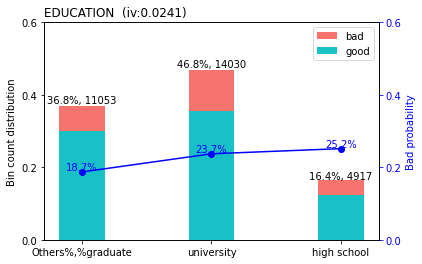

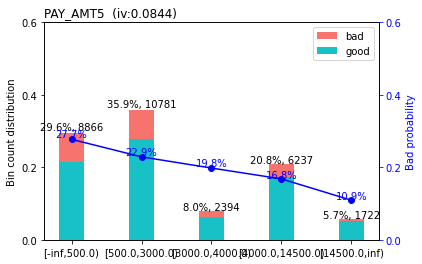

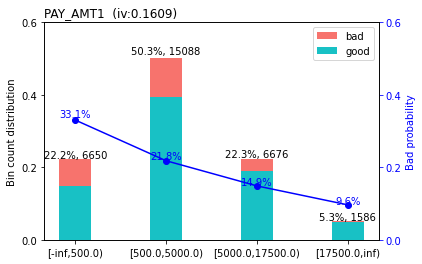

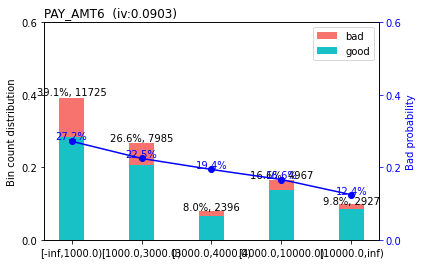

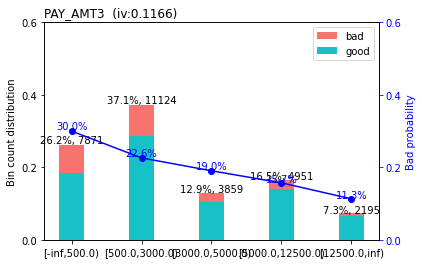

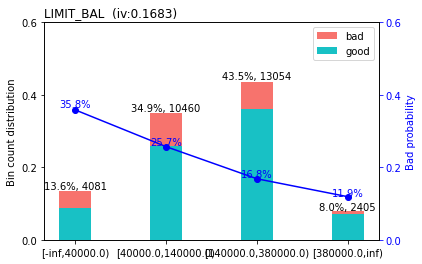

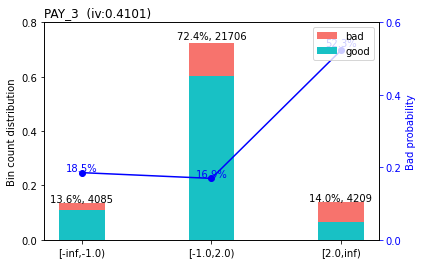

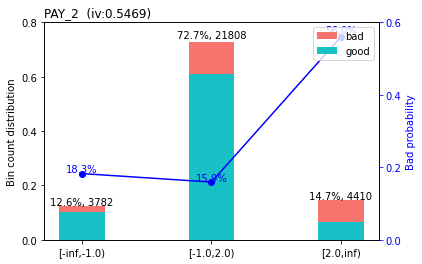

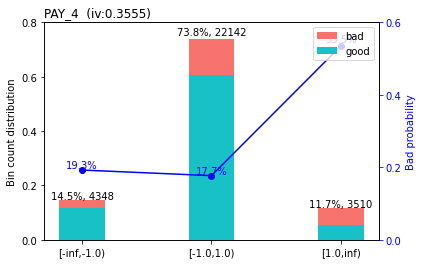

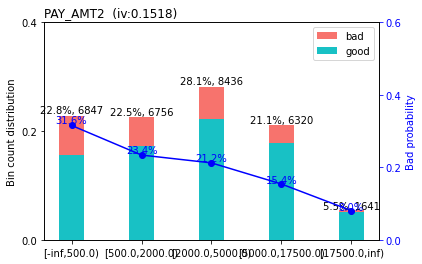

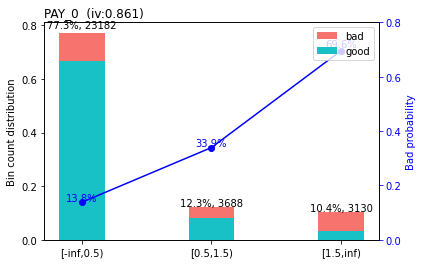

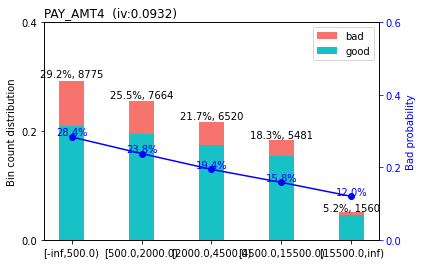

In [49]:
#add your code to plot bins2

sc.woebin_plot(bins2)

### Create the Logistic regression model

**Create the train and test datasets using sc.split_df() method**

In [61]:
#add your code here

train, test = sc.split_df(default_data_sc2, 'default', ratio=0.7).values()
print(train.shape)
print(test.shape)


(21000, 13)
(9000, 13)
       LIMIT_BAL    EDUCATION  PAY_0  PAY_2  PAY_3  PAY_4  PAY_AMT1  PAY_AMT2  \
3          50000   university      0      0      0      0      2000      2019   
4          50000   university     -1      0     -1      0      2000     36681   
5          50000     graduate      0      0      0      0      2500      1815   
7         100000   university      0     -1     -1      0       380       601   
10        200000  high school      0      0      2      0      2306        12   
...          ...          ...    ...    ...    ...    ...       ...       ...   
29980      50000  high school      0      0      0      0     10000      4000   
29982      90000   university      0      0      0      0      1500      1500   
29985     240000     graduate     -2     -2     -2     -2         0         0   
29988     250000     graduate      0      0      0      0     65000      8800   
29996     150000  high school     -1     -1     -1     -1      1837      3526   

    

**Transfrom train and test data into woe values using the  sc.woebin_ply() method**

In [51]:
#add your code here

train_woe = sc.woebin_ply(train, bins2)
test_woe = sc.woebin_ply(test, bins2)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,default,EDUCATION_woe,PAY_AMT5_woe,PAY_AMT1_woe,PAY_AMT6_woe,PAY_AMT3_woe,LIMIT_BAL_woe,PAY_3_woe,PAY_2_woe,PAY_4_woe,PAY_AMT2_woe,PAY_0_woe,PAY_AMT4_woe
0,1,0.091416,0.300488,0.552881,0.273671,0.411208,0.676765,-0.33087,1.501138,-0.277851,0.072079,2.084775,0.332804
1,1,0.091416,0.300488,0.552881,0.019319,0.027638,0.197458,-0.33087,1.501138,-0.277851,0.072079,-0.570459,0.094988
2,0,0.091416,0.044275,-0.017578,-0.353411,0.027638,0.197458,-0.33087,-0.404764,-0.277851,0.072079,-0.570459,0.094988
6,0,-0.209693,-0.340970,-0.978401,-0.693093,-0.801929,-0.744021,-0.33087,-0.404764,-0.277851,-1.177714,-0.570459,-0.734958
8,0,0.168463,0.044275,-0.017578,0.019319,0.411208,-0.338483,1.35046,-0.404764,-0.277851,0.484679,-0.570459,0.094988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,1,0.091416,0.300488,-0.485817,-0.353411,0.411208,0.197458,1.35046,1.501138,1.400233,-0.053113,2.084775,-0.411755
29995,0,0.168463,-0.340970,-0.485817,0.019319,-0.420977,-0.338483,-0.33087,-0.404764,-0.277851,-1.177714,-0.570459,-0.163460
29997,1,0.091416,0.044275,0.552881,-0.165069,-0.801929,0.676765,1.35046,1.501138,-0.277851,0.484679,2.084775,-0.163460
29998,1,0.168463,-0.840505,-0.978401,0.019319,0.027638,0.197458,-0.33087,-0.404764,-0.277851,-0.053113,0.593072,0.094988


**Create the X and y parts of the data for train and test. Then fit the Logistic regression model**<br>

<font color = 'blue' size = 4>Ex Q3. **Print the intercept and coefficients of the model.**</font>

In [52]:
#add your code here

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

#create a logistic regression model object
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[0.27630013 0.15304832 0.2149575  0.14659023 0.15395426 0.3040023
  0.1573048  0.09278974 0.30730466 0.24914222 0.75768871 0.15588983]]
[-1.25941406]


**Evaluate the performance of logistic regression model with KS and ROC**

**Use the sc.perf_eva() method**

C:\Users\Quek Jazryl\AppData\Local\Programs\Python\Python39\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)
C:\Users\Quek Jazryl\AppData\Local\Programs\Python\Python39\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)


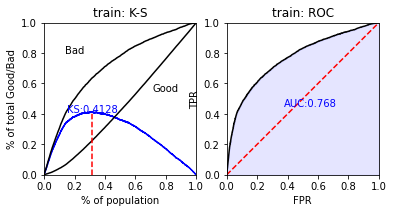

C:\Users\Quek Jazryl\AppData\Local\Programs\Python\Python39\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)
C:\Users\Quek Jazryl\AppData\Local\Programs\Python\Python39\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)


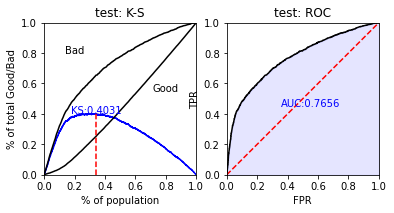

In [53]:
#add your code here
# Evaluate the performance of the Logistic Regression
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

**Use the model predict() method to generate predictions and print the Evaluation metrics of the model using sklearn.metrics methods**

In [54]:
#add your code here

y_pred = lr.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7983
           1       0.35      0.68      0.46      1017

    accuracy                           0.82      9000
   macro avg       0.65      0.76      0.68      9000
weighted avg       0.89      0.82      0.84      9000

[[6685 1298]
 [ 324  693]]


### Generate the scorecard based on results from woebin and Logistic regression model

**Use the sc.scorecard and sc.scorecard_ply() methods. Plot the distribution of scores on test data. Additionally set the basepoints_eq0 = True/False to see how the basepoints change**

{'EDUCATION':     variable                bin  count  count_distr   good   bad   badprob  \
0  EDUCATION  Others%,%graduate  11053     0.368433   8984  2069  0.187189   
1  EDUCATION         university  14030     0.467667  10700  3330  0.237349   
2  EDUCATION        high school   4917     0.163900   3680  1237  0.251576   

        woe    bin_iv  total_iv             breaks  is_special_values  
0 -0.209693  0.015253  0.024129  Others%,%graduate              False  
1  0.091416  0.004008  0.024129         university              False  
2  0.168463  0.004869  0.024129        high school              False  , 'PAY_AMT5':    variable               bin  count  count_distr  good   bad   badprob  \
0  PAY_AMT5      [-inf,500.0)   8866     0.295533  6408  2458  0.277239   
1  PAY_AMT5    [500.0,3000.0)  10781     0.359367  8313  2468  0.228921   
2  PAY_AMT5   [3000.0,4000.0)   2394     0.079800  1920   474  0.197995   
3  PAY_AMT5  [4000.0,14500.0)   6237     0.207900  5189  1048  0.168030 

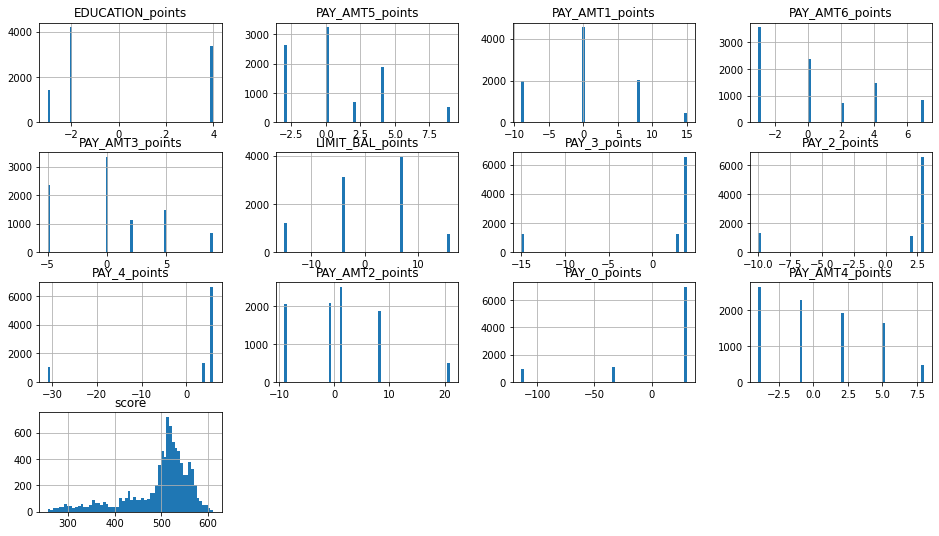

In [60]:
#add your code here
print(bins2)

card = sc.scorecard(bins2, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, card, only_total_score=False)
test_score = sc.scorecard_ply(test, card, only_total_score=False)
test_score.hist(figsize=(16,9),bins=60)
plt.show()

In [64]:
print(test_score)

       EDUCATION_points  PAY_AMT5_points  PAY_AMT1_points  PAY_AMT6_points  \
3                  -2.0             -0.0              0.0             -0.0   
4                  -2.0             -0.0              0.0             -3.0   
5                   4.0             -0.0              0.0             -3.0   
7                  -2.0             -0.0             -9.0             -0.0   
10                 -3.0              2.0              0.0             -3.0   
...                 ...              ...              ...              ...   
29980              -3.0              4.0              8.0             -0.0   
29982              -2.0             -0.0              0.0             -3.0   
29985               4.0             -3.0             -9.0             -3.0   
29988               4.0              4.0             15.0              4.0   
29996              -3.0             -3.0              0.0             -3.0   

       PAY_AMT3_points  LIMIT_BAL_points  PAY_3_points  PAY_2_p

**Print the scorecard using pprint() and analyse the distribution of points from scorecard**

In [56]:
pprint.pprint(card)

{'EDUCATION':     variable                bin  points
0  EDUCATION  Others%,%graduate     4.0
1  EDUCATION         university    -2.0
2  EDUCATION        high school    -3.0,
 'LIMIT_BAL':      variable                  bin  points
22  LIMIT_BAL       [-inf,40000.0)   -15.0
23  LIMIT_BAL   [40000.0,140000.0)    -4.0
24  LIMIT_BAL  [140000.0,380000.0)     7.0
25  LIMIT_BAL       [380000.0,inf)    16.0,
 'PAY_0':    variable         bin  points
40    PAY_0  [-inf,0.5)    31.0
41    PAY_0   [0.5,1.5)   -32.0
42    PAY_0   [1.5,inf)  -114.0,
 'PAY_2':    variable          bin  points
29    PAY_2  [-inf,-1.0)     2.0
30    PAY_2   [-1.0,2.0)     3.0
31    PAY_2    [2.0,inf)   -10.0,
 'PAY_3':    variable          bin  points
26    PAY_3  [-inf,-1.0)     3.0
27    PAY_3   [-1.0,2.0)     4.0
28    PAY_3    [2.0,inf)   -15.0,
 'PAY_4':    variable          bin  points
32    PAY_4  [-inf,-1.0)     4.0
33    PAY_4   [-1.0,1.0)     6.0
34    PAY_4    [1.0,inf)   -31.0,
 'PAY_AMT1':     variable  

<font color = 'blue' size = 4>Exercise Q4 : Consider a sample data point and assign the scores manually using scorecard.
    Chose a datapoint from test df and it's corresponding score from test score dataframe to compare the manual scores with the model score</font>

In [57]:
#E.g consider this data point from test df
print(test.loc[3])

LIMIT_BAL         50000
EDUCATION    university
PAY_0                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_AMT1           2000
PAY_AMT2           2019
PAY_AMT3           1200
PAY_AMT4           1100
PAY_AMT5           1069
PAY_AMT6           1000
default               0
Name: 3, dtype: object


In [58]:
test_score.loc[3]

EDUCATION_points     -2.0
PAY_AMT5_points      -0.0
PAY_AMT1_points       0.0
PAY_AMT6_points      -0.0
PAY_AMT3_points      -0.0
LIMIT_BAL_points     -4.0
PAY_3_points          4.0
PAY_2_points          3.0
PAY_4_points          6.0
PAY_AMT2_points       1.0
PAY_0_points         31.0
PAY_AMT4_points      -1.0
score               516.0
Name: 3, dtype: float64

In [59]:
# limit_bal = -4
# education = -2
# pay_0 = 31
# pay_2 = 3
# pay_3 = 4
# pay_4 = 6
# pay_amt1 = 0
# pay_amt2 = 1
# pay_amt3 = 0
# pay_amt4 = -1
# pay_amt5 = 0
# pay_amt6 = 0

points = sum([-4, -2, 31, 3, 4, 6, 0, 1, 0, -1, 0, 0])

print(card["basepoints"]["points"] + points)

0    516.0
Name: points, dtype: float64
